In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

data = pd.read_csv("AmesHousing.txt",delimiter = "\t")

In [3]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
null_count = data.isnull().sum()
null_count

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [7]:
data.shape   ###

(2930, 82)

In [8]:
data.shape[0]  ###

2930

In [9]:
dlt = null_count[null_count>data.shape[0]/20].index  

In [10]:
dlt

Index(['Lot Frontage', 'Alley', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [11]:
data.drop(dlt, axis = 1, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [13]:
dt = data.dtypes 

dt[dt==object].index

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [14]:
dt

Order              int64
PID                int64
MS SubClass        int64
MS Zoning         object
Lot Area           int64
                   ...  
Mo Sold            int64
Yr Sold            int64
Sale Type         object
Sale Condition    object
SalePrice          int64
Length: 71, dtype: object

In [15]:
data.select_dtypes(object)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Unf,GasA,Fa,Y,SBrkr,TA,Typ,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,Unf,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,ALQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Unf,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal


In [16]:
data.select_dtypes(object).shape

(2930, 34)

In [17]:
data.select_dtypes(object).isnull().sum()

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

In [18]:
obj_null = data.select_dtypes(object).isnull().sum()
obj_null[obj_null>0]

# object having null values. 

Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Electrical         1
dtype: int64

In [19]:
dlt_obj = obj_null[obj_null>0].index 

In [20]:
dlt_obj

Index(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical'],
      dtype='object')

In [21]:
data.drop(dlt_obj, axis = 1, inplace = True)

In [22]:
data.shape

(2930, 64)

In [23]:
(data.isnull().sum()>0).sum()

9

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [25]:
data.select_dtypes([np.int64, np.float64]).shape

(2930, 37)

In [26]:
num_null = data.select_dtypes([np.int64, np.float64]).isnull().sum()

missing_num = num_null[num_null>0].index
missing_num

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [27]:
# data.select_dtypes([np.int64, np.float64])


In [28]:
data[missing_num].median()

Mas Vnr Area        0.0
BsmtFin SF 1      370.0
BsmtFin SF 2        0.0
Bsmt Unf SF       466.0
Total Bsmt SF     990.0
Bsmt Full Bath      0.0
Bsmt Half Bath      0.0
Garage Cars         2.0
Garage Area       480.0
dtype: float64

In [29]:
fill = data[missing_num].mode().to_dict(orient = "record")[0] 
fill                                                          

{'Mas Vnr Area': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0}

In [30]:
data.fillna(fill, inplace = True)

In [31]:
(data.isnull().sum()>0).sum()

0

In [32]:
data['Garage Cars'].value_counts().index[0]

2.0

In [33]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [34]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'Sale Ty

In [35]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold

0       50
1       49
2       52
3       42
4       13
        ..
2925    22
2926    23
2927    14
2928    32
2929    13
Length: 2930, dtype: int64

In [36]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold [years_sold<0]

2180   -1
dtype: int64

In [37]:
years_rmd = data['Yr Sold'] - data['Year Remod/Add']  
years_rmd[years_rmd<0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [38]:
data["Years Before Sale"] = years_sold
data["Years Since Remod"] = years_rmd          

In [39]:
data.drop([1702, 2180,2181], axis = 0,inplace = True)

In [40]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,189900,13,12


In [41]:
data.drop(["Order","PID"], axis = 1, inplace = True)

In [42]:
data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condi

In [43]:
data['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw',
       'CWD', 'VWD'], dtype=object)

In [44]:

data_leak = ['Mo Sold', 'Yr Sold', 'Sale Type','Sale Condition'] 


In [45]:
data.drop(data_leak,axis = 1, inplace = True)

In [46]:
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,13,12


In [47]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS SubClass        2927 non-null   int64  
 1   MS Zoning          2927 non-null   object 
 2   Lot Area           2927 non-null   int64  
 3   Street             2927 non-null   object 
 4   Lot Shape          2927 non-null   object 
 5   Land Contour       2927 non-null   object 
 6   Utilities          2927 non-null   object 
 7   Lot Config         2927 non-null   object 
 8   Land Slope         2927 non-null   object 
 9   Neighborhood       2927 non-null   object 
 10  Condition 1        2927 non-null   object 
 11  Condition 2        2927 non-null   object 
 12  Bldg Type          2927 non-null   object 
 13  House Style        2927 non-null   object 
 14  Overall Qual       2927 non-null   int64  
 15  Overall Cond       2927 non-null   int64  
 16  Year Built         2927 

In [49]:
corr = data.select_dtypes([np.int64, np.float64]).corr()["SalePrice"].abs().sort_values(ascending = False)
corr

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Year Built           0.558490
Full Bath            0.546118
Years Since Remod    0.534985
Year Remod/Add       0.533007
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Enclosed Porch       0.128685
Kitchen AbvGr        0.119760
Screen Porch         0.112280
Overall Cond         0.101540
MS SubClass          0.085128
Pool Area            0.068438
Low Qual Fin SF      0.037629
Bsmt Half Bath       0.035875
3Ssn Porch           0.032268
Misc Val  

In [50]:
rem = corr[corr<0.4].index 
rem

Index(['Wood Deck SF', 'Open Porch SF', 'Half Bath', 'Bsmt Full Bath',
       '2nd Flr SF', 'Lot Area', 'Bsmt Unf SF', 'Bedroom AbvGr',
       'Enclosed Porch', 'Kitchen AbvGr', 'Screen Porch', 'Overall Cond',
       'MS SubClass', 'Pool Area', 'Low Qual Fin SF', 'Bsmt Half Bath',
       '3Ssn Porch', 'Misc Val', 'BsmtFin SF 2'],
      dtype='object')

In [51]:
data.drop(rem, axis = 1, inplace = True)

In [52]:
data.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,6,Typ,1,2.0,482.0,Y,189900,13,12


In [53]:
c = data.select_dtypes([np.int64, np.float64]).corr()
c

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,Years Before Sale,Years Since Remod
Overall Qual,1.000000,0.596404,0.568942,0.418972,0.278274,0.545792,0.474888,0.567902,0.520942,0.376199,0.391604,0.598485,0.561303,0.801206,-0.596358,-0.570231
Year Built,0.596404,1.000000,0.611549,0.305963,0.279569,0.409489,0.310904,0.239688,0.468698,0.109148,0.169559,0.536465,0.479752,0.558490,-0.999054,-0.612407
Year Remod/Add,0.568942,0.611549,1.000000,0.189846,0.150011,0.298117,0.241128,0.316236,0.456567,0.195469,0.132178,0.424706,0.374299,0.533007,-0.609186,-0.998006
Mas Vnr Area,0.418972,0.305963,0.189846,1.000000,0.284305,0.378545,0.376205,0.387355,0.252318,0.267328,0.267449,0.354753,0.365786,0.506983,-0.306163,-0.190821
BsmtFin SF 1,0.278274,0.279569,0.150011,0.284305,1.000000,0.522775,0.439662,0.188245,0.073805,0.030338,0.293897,0.252932,0.303824,0.439284,-0.278070,-0.148456
Total Bsmt SF,0.545792,0.409489,0.298117,0.378545,0.522775,1.000000,0.792227,0.426689,0.324943,0.266420,0.331919,0.438589,0.482306,0.644012,-0.409209,-0.298629
1st Flr SF,0.474888,0.310904,0.241128,0.376205,0.439662,0.792227,1.000000,0.546943,0.372838,0.377083,0.406965,0.441002,0.488603,0.635185,-0.310902,-0.241824
Gr Liv Area,0.567902,0.239688,0.316236,0.387355,0.188245,0.426689,0.546943,1.000000,0.633355,0.806092,0.455685,0.489469,0.480458,0.717596,-0.240369,-0.317779
Full Bath,0.520942,0.468698,0.456567,0.252318,0.073805,0.324943,0.372838,0.633355,1.000000,0.528647,0.229024,0.477338,0.405233,0.546118,-0.468171,-0.456866
TotRms AbvGrd,0.376199,0.109148,0.195469,0.267328,0.030338,0.266420,0.377083,0.806092,0.528647,1.000000,0.300400,0.353491,0.322227,0.498574,-0.110243,-0.197317


to check co-linearity

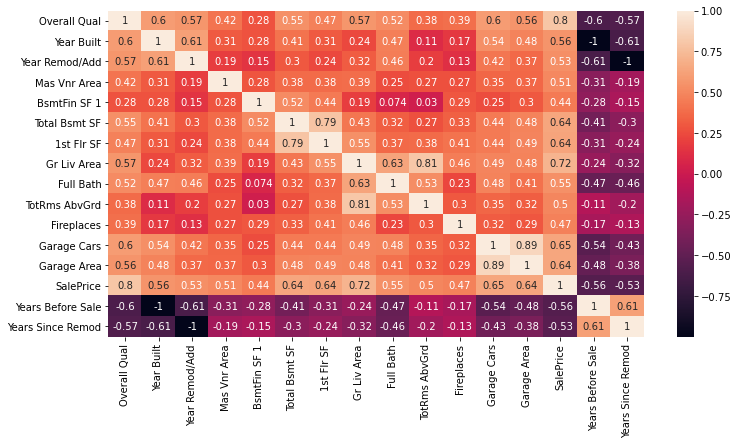

In [54]:
import seaborn as sns

plt.figure(figsize = (12,6))
sns.heatmap(c, annot = True)
plt.show()

similar columns in the data creating duplication. we will select the columns
gives more ccurate info and droping other columns

In [113]:
dup = ["Gr Liv Area", 'TotRms AbvGrd','Garage Cars','Garage Area', '1st Flr SF', 'BsmtFin SF 1']
data[dup]

,Gr Liv Area,TotRms AbvGrd,Garage Cars,Garage Area,1st Flr SF,BsmtFin SF 1
0,1656,7,2.0,528.0,1656,639.0
1,896,5,1.0,730.0,896,468.0
2,1329,6,1.0,312.0,1329,923.0
3,2110,8,2.0,522.0,2110,1065.0
4,1629,6,2.0,482.0,928,791.0
...,...,...,...,...,...,...
2925,1003,6,2.0,588.0,1003,819.0
2926,902,5,2.0,484.0,902,301.0
2927,970,6,0.0,0.0,970,337.0
2928,1389,6,2.0,418.0,1389,1071.0


In [114]:
data.drop(['TotRms AbvGrd','Garage Cars','1st Flr SF'], axis = 1, inplace = True)

In [115]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Area',
     

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MS Zoning          2927 non-null   object 
 1   Street             2927 non-null   object 
 2   Lot Shape          2927 non-null   object 
 3   Land Contour       2927 non-null   object 
 4   Utilities          2927 non-null   object 
 5   Lot Config         2927 non-null   object 
 6   Land Slope         2927 non-null   object 
 7   Neighborhood       2927 non-null   object 
 8   Condition 1        2927 non-null   object 
 9   Condition 2        2927 non-null   object 
 10  Bldg Type          2927 non-null   object 
 11  House Style        2927 non-null   object 
 12  Overall Qual       2927 non-null   int64  
 13  Year Built         2927 non-null   int64  
 14  Year Remod/Add     2927 non-null   int64  
 15  Roof Style         2927 non-null   object 
 16  Roof Matl          2927 

In [59]:
hetro = data.select_dtypes([np.int64, np.float64])
hetro = (hetro-hetro.min())/(hetro.max()- hetro.min())
hetro.var().sort_values(ascending = False)

Year Remod/Add       0.120834
Years Since Remod    0.120806
Years Before Sale    0.049585
Year Built           0.048015
Fireplaces           0.026216
Overall Qual         0.024461
Garage Area          0.020827
Full Bath            0.019077
Mas Vnr Area         0.012250
SalePrice            0.011593
Gr Liv Area          0.008794
BsmtFin SF 1         0.006348
Total Bsmt SF        0.005022
dtype: float64

In [60]:
data.drop(["Gr Liv Area", "BsmtFin SF 1", "Total Bsmt SF"], axis = 1, inplace = True)

In [61]:
data.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Central Air,Full Bath,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Y,1,TA,Typ,2,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,Y,1,TA,Typ,0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Y,1,Gd,Typ,0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Y,2,Ex,Typ,2,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Y,2,TA,Typ,1,482.0,Y,189900,13,12


In [62]:
print(nominal_features)

['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [63]:
available = []

for i in nominal_features:
    if i in data.columns:
        available.append(i)

In [64]:
print(available)

['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating', 'Central Air']


In [65]:
uniq = data[available].apply(lambda col: len(col.unique()),  axis = 0)
uniq

MS Zoning        7
Street           2
Land Contour     4
Lot Config       5
Neighborhood    28
Condition 1      9
Condition 2      8
Bldg Type        5
House Style      8
Roof Style       6
Roof Matl        8
Exterior 1st    16
Exterior 2nd    17
Foundation       6
Heating          6
Central Air      2
dtype: int64

In [66]:
uniq = data[available].apply(lambda col: len(col.unique()),  axis = 0)
rmv_uniq = uniq[uniq>10].index
rmv_uniq

Index(['Neighborhood', 'Exterior 1st', 'Exterior 2nd'], dtype='object')

In [67]:
uniq

MS Zoning        7
Street           2
Land Contour     4
Lot Config       5
Neighborhood    28
Condition 1      9
Condition 2      8
Bldg Type        5
House Style      8
Roof Style       6
Roof Matl        8
Exterior 1st    16
Exterior 2nd    17
Foundation       6
Heating          6
Central Air      2
dtype: int64

In [68]:
data.drop(rmv_uniq, axis = 1, inplace = True)

In [69]:
data.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,...,Central Air,Full Bath,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,Y,1,TA,Typ,2,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,...,Y,1,TA,Typ,0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,Y,1,Gd,Typ,0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,Y,2,Ex,Typ,2,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,Y,2,TA,Typ,1,482.0,Y,189900,13,12


In [70]:
data["Utilities"].unique()

array(['AllPub', 'NoSewr', 'NoSeWa'], dtype=object)

In [72]:
data["Utilities"].astype("category").cat.codes.value_counts() 

0    2924
2       2
1       1
dtype: int64

### Converting string (object) data into numeric


In [73]:
objec = data.select_dtypes("object")

In [74]:
ohe = pd.get_dummies(objec) 
ohe.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1


In [75]:
data = pd.concat([data,ohe], axis = 1)
data

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,1,0
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,1


In [76]:
data.drop(objec.columns, axis = 1, inplace = True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Columns: 126 entries, Overall Qual to Paved Drive_Y
dtypes: float64(2), int64(8), uint8(116)
memory usage: 583.1 KB


In [78]:
saleprice = data["SalePrice"]
saleprice.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [79]:
data = (data - data.min())/(data.max()- data.min())  
data.head()                                      

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Full Bath,Fireplaces,Garage Area,SalePrice,Years Before Sale,Years Since Remod,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0.555556,0.637681,0.166667,0.0700,0.25,0.50,0.354839,0.272444,0.367647,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.444444,0.644928,0.183333,0.0000,0.25,0.00,0.490591,0.124238,0.360294,0.816667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.555556,0.623188,0.133333,0.0675,0.25,0.00,0.209677,0.214509,0.382353,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.695652,0.300000,0.0000,0.50,0.50,0.350806,0.311517,0.308824,0.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.444444,0.905797,0.800000,0.0000,0.50,0.25,0.323925,0.238626,0.095588,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [80]:
data["SalePrice"] = saleprice

In [81]:
pd.options.display.max_columns = None
data.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Full Bath,Fireplaces,Garage Area,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0.555556,0.637681,0.166667,0.0700,0.25,0.50,0.354839,215000,0.367647,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.444444,0.644928,0.183333,0.0000,0.25,0.00,0.490591,105000,0.360294,0.816667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.555556,0.623188,0.133333,0.0675,0.25,0.00,0.209677,172000,0.382353,0.866667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.695652,0.300000,0.0000,0.50,0.50,0.350806,244000,0.308824,0.700000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [82]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler   

In [83]:
from sklearn.linear_model import LinearRegression 

In [84]:
data = data.sample(frac = 1, random_state = 1)
data.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Full Bath,Fireplaces,Garage Area,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
1117,0.777778,0.978261,0.950000,0.0975,0.75,0.25,0.571909,257000,0.007353,0.016667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
192,0.666667,0.362319,0.916667,0.0000,0.25,0.25,0.211694,209500,0.647059,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2194,0.555556,0.304348,0.750000,0.0000,0.50,0.00,0.000000,200000,0.683824,0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
45,0.666667,0.992754,1.000000,0.0800,0.50,0.25,0.325269,224000,0.007353,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [85]:
data.shape

(2927, 126)

In [86]:
indx = int(2927*.75)

In [87]:
train = data[:indx]
test = data[indx:]

In [88]:
features = train.columns.drop("SalePrice")
target = "SalePrice"

In [89]:
model = LinearRegression()
model.fit(train[features], train[target])

LinearRegression()

In [90]:
prediction = model.predict(test[features])

In [91]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(prediction,test[target])
rmse = np.sqrt(mse)
rmse

143632050099519.88

In [92]:
data

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Full Bath,Fireplaces,Garage Area,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
1117,0.777778,0.978261,0.950000,0.0975,0.75,0.25,0.571909,257000,0.007353,0.016667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
192,0.666667,0.362319,0.916667,0.0000,0.25,0.25,0.211694,209500,0.647059,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2194,0.555556,0.304348,0.750000,0.0000,0.50,0.00,0.000000,200000,0.683824,0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
45,0.666667,0.992754,1.000000,0.0800,0.50,0.25,0.325269,224000,0.007353,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [93]:
y = a1x1+ a2x2+=---------------------------------------------a131x131 + a0


SyntaxError: invalid syntax (<ipython-input-93-f8bdc3466018>, line 1)

In [94]:
model.coef_ # also 131

array([ 1.35845915e+05,  3.50611991e+14, -1.52439996e+14,  7.99381401e+04,
        6.34088528e+04,  6.43135975e+04,  8.66830314e+04,  3.45530658e+14,
       -1.52439996e+14, -2.82386352e+15, -6.15109201e+14, -6.15109201e+14,
       -6.15109201e+14, -6.15109201e+14, -6.15109201e+14, -6.15109201e+14,
       -2.40787467e+14, -2.40787467e+14, -1.98285507e+15, -1.98285507e+15,
       -1.98285507e+15, -1.98285507e+15, -3.53320844e+15, -3.53320844e+15,
       -3.53320844e+15, -3.53320844e+15,  1.21057110e+15,  1.21057110e+15,
        1.21057110e+15, -4.92512132e+14, -4.92512132e+14, -4.92512132e+14,
       -4.92512132e+14, -4.92512132e+14, -2.80372434e+15, -2.80372434e+15,
       -2.80372434e+15,  2.01968583e+15,  2.01968583e+15,  2.01968583e+15,
        2.01968583e+15,  2.01968583e+15,  2.01968583e+15,  2.01968583e+15,
        2.01968583e+15,  2.01968583e+15,  4.50947938e+14,  4.50947938e+14,
        4.50947938e+14,  4.50947938e+14,  4.50947938e+14,  4.50947938e+14,
       -1.45320393e+13,  

In [95]:
model.intercept_

-9.866956023756794e+16

In [96]:
data.shape

(2927, 126)

In [3]:
2927//4 

731

In [98]:
2927-731

2196

In [4]:
training = 0-731
test 731 - 1462
training 1462 -2196

SyntaxError: invalid syntax (<ipython-input-4-732b9386389f>, line 2)

In [101]:
k = 4

training = k-1
test = 1

In [102]:
731+731

1462

## K Fold

In [103]:
from sklearn.model_selection import KFold

In [104]:
kf = KFold(n_splits=5,shuffle= True , random_state=123) 

model = LinearRegression()

rmses = []
for train_index, test_index in kf.split(data): 
    
    #print(train_index, test_index)
    train = data.iloc[train_index]
    test = data.iloc[test_index]
    model.fit(train[features], train[target])
    prediction = model.predict(test[features])
    mse = mean_squared_error(prediction, test[target])
    rmse = np.sqrt(mse)
    rmses.append(rmse)

In [105]:
np.mean(rmses)

599605446177762.0

In [106]:
22766213056586.42 - 142088070226233.06

-119321857169646.64

In [107]:
data.corr()["SalePrice"].abs().sort_values(ascending = False)

SalePrice             1.000000
Overall Qual          0.801206
Garage Area           0.641425
Exter Qual_TA         0.591013
Years Before Sale     0.558979
                        ...   
House Style_2.5Unf    0.004106
Condition 2_RRAe      0.002136
Condition 1_RRAn      0.001067
Roof Matl_Metal       0.000177
Foundation_Wood       0.000069
Name: SalePrice, Length: 126, dtype: float64

In [108]:
import pandas as pd

data = pd.read_csv("AmesHousing.txt",delimiter = "\t")

In [109]:
data.select_dtypes(object).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [110]:
data['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64

In [111]:
data["Utilities"].astype("category").cat.codes.var() 
# dont take the column of Utilities since its approx. all same value

0.0030698079811511793